# Javad Ranjbar Kermani
## Logistic Regression

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
data1 = pd.read_csv('micro_test_data.txt',names=['Feature1', 'Feature2', 'Confirmed'])
data1.head()

,Feature1,Feature2,Confirmed
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


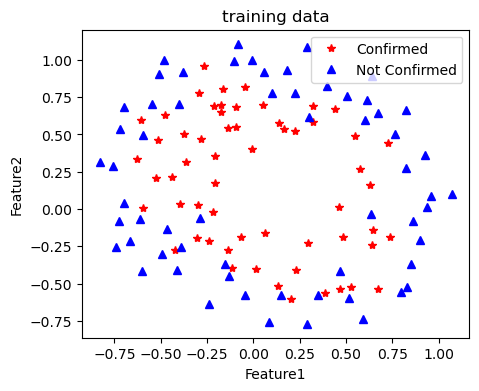

In [2]:
# plotting labels in terms of features
plt.figure(figsize=(5,4))
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('training data')
plt.plot(data1['Feature1'][data1['Confirmed']==1],
         data1['Feature2'][data1['Confirmed']==1], 'r*',
         label='Confirmed')
plt.plot(data1['Feature1'][data1['Confirmed']==0],
         data1['Feature2'][data1['Confirmed']==0], 'b^',
         label='Not Confirmed')
plt.legend()
plt.show()

### feature mapping

In [3]:
# function for feature mapping and creating new features from pervious features
def Feature_mapping(data, features, degree):
    """
        This function reuturns df (new dataset after feature mapping)
        data : data in dataset
        features : number of features
        degree = degree of feature mapping
    """
    df = copy.deepcopy(data)
    degree = degree
    df.insert(0, 'Ones', 1) # Insert a first column with ones.
    x = []
    for n in range(1, features + 1):
        x.append(df.iloc[:, n])
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            df['x' + str(i) + str(j)] = np.power(x[0], i-j) * np.power(x[1], j)
    cols = [0, 1, 2] # unnecessary and repetitious columns
    df.drop(df.columns[cols], axis=1, inplace=True)
    cols = df.columns.tolist()
    cols = cols[1:] + [cols[0]]
    df = df[cols]
    return df

### Data processing 

In [4]:
# Create a function to pepare the data.
def Data_process(data):
    """
        This function reuturns features, labels, and initial theta in the form of numpy array 
        data : data in dataset
    """
    data.insert(0, 'Ones', 1)
    x = data.iloc[:, 0:-1]
    y = data.iloc[:, -1]
    x = np.array(x.values)
    y = np.array(y.values).reshape(x.shape[0],1)
    theta = np.zeros((x.shape[1], 1))
    return x, y, theta

In [5]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

### gardient descent method

In [6]:
def gardeint_descent(x,y,theta_init,n,epsilon,lambd):
    """
        This function reuturns theta, final cost function, cost function array and
        maximum iteration until convergence (i).
        x : input 
        y : output
        theta_init : initial guess for theta coefficient
        alpha: learning rate
        n : maximum iteration
        epsilon : accuracy
        lambd : reguralization factor
    """
    m = x.shape[0]
    alpha = 0.5 # learning rate
    theta = theta_init # initial guess
    h = sigmoid(np.dot(x, theta)) # hypothesis
    cost = np.ones(n) # initial guess
    cost_init1 = 1 # initial guess
    cost_init2 = 0 # initial guess
    i = 0 # counter
    while abs(cost_init1 - cost_init2)>epsilon and i<n:
        cost_init2 = cost_init1
        gradient = (1/m)* np.dot(x.T, (h-y)) + (lambd/m)*theta
        theta = theta - (alpha/m) * gradient
        h = sigmoid(np.dot(x, theta))        
        cost[i] = np.sum(np.dot(-y.T, np.log(h)) - np.dot((1 - y).T, np.log(1 - h))) / m + sum((lambd/(2*m))* theta**2)
        cost_init1 = cost[i]
        i = i+1 
        if i == n :
            print('The gradient descent methos is not converged!')
    return(theta,cost[:i], cost[i-1],i)

(118, 6) (118, 1) (6, 1)


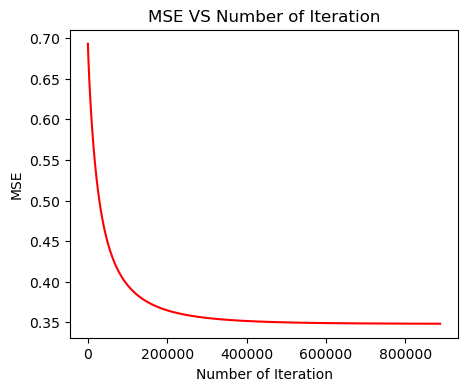

[[  4.99805083]
 [  3.11368911]
 [  4.00677241]
 [-11.62441582]
 [ -7.20197032]
 [-11.39864065]]
0.34827864999755764
887694


In [7]:
mapped_data = Feature_mapping(data1, features=2, degree=2)
x, y, theta_init = Data_process(mapped_data)
print(x.shape, y.shape, theta_init.shape)
theta , cost_array , cost , i = gardeint_descent(x,y,theta_init,1000000,0.000000001,0)
plt.figure(figsize=(5, 4))
plt.xlabel('Number of Iteration')
plt.ylabel('MSE')
plt.title('MSE VS Number of Iteration') # plotting mean square error
plt.plot(cost_array , color = 'red')
plt.show()
print(theta)
print(cost)
print(i)

### plotting decision boundary for different values of regularization factor (lambda)

λ = 0


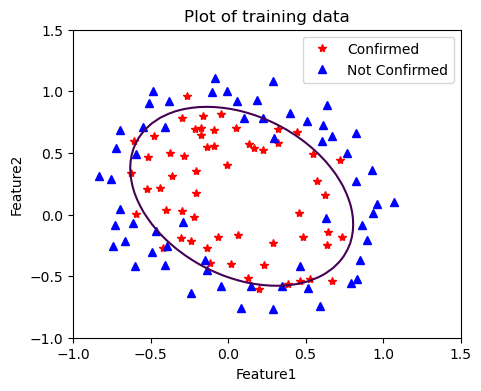

λ = 1


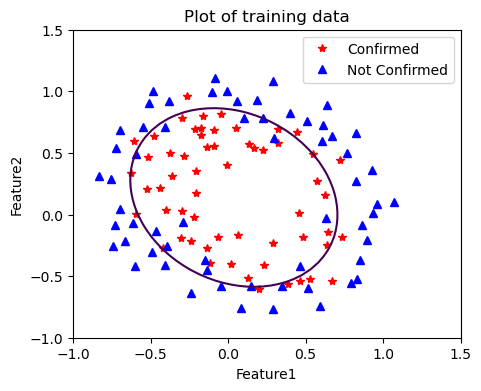

λ = 10


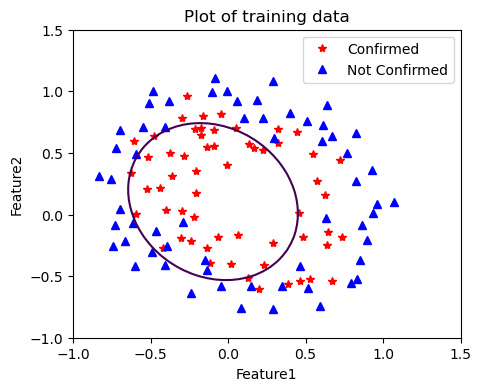

λ = 50


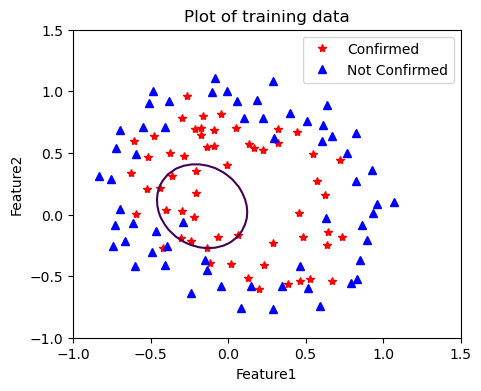

In [8]:
lambda_values = {"λ = 0": 0,"λ = 1": 1, "λ = 10": 10, "λ = 50": 50}
for i,j in lambda_values.items():
    print(i)
    theta , cost_array , cost , i = gardeint_descent(x,y,theta_init,1000000,0.000000001,j)
    # Create the meshgrid.
    xs = np.linspace(-1, 1.5, 50)
    ys = np.linspace(-1, 1.5, 50)
    xx, yy = np.meshgrid(xs, ys)
    zs = np.zeros((len(xs), len(ys)))

    # Create the dataset from the above columns.
    data = pd.DataFrame({'xs': xx.ravel(),
                    'ys': yy.ravel(),
                    'zs': zs.ravel()})

    # Feature mapping of data
    mapped_data = Feature_mapping(data, 2, 2)

    # Prepare the data.
    xx1, yy1, theta1 = Data_process(mapped_data)

    # Compute the classifier’s predictions.
    h = sigmoid(np.dot(xx1, theta))
    h = h.reshape((50, 50))

    plt.figure(figsize=(5, 4))
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Plot of training data')
    plt.plot(data1['Feature1'][data1['Confirmed']==1],
    data1['Feature2'][data1['Confirmed']==1], 'r*',
    label='Confirmed')
    plt.plot(data1['Feature1'][data1['Confirmed']==0],
    data1['Feature2'][data1['Confirmed']==0], 'b^',
    label='Not Confirmed')
    plt.legend()
    plt.contour(xx, yy, h, [0.5])
    plt.show()
